# # 회귀문제의 정의

머신러닝 "컴퓨터에 의해 명시적으로 프로그램되지 않고도 배울 수 있는 학습 능력을 주는 연구 분야"

머신 러닝 알고리즘 방법
- 지도 학습(supervised learning)
- 비지도 학습(unsupervised learning)
- 강화학습(reinforcement learning)

머신 러닝에서는 일반적으로 통계학에서 변화하는 무엇인가를 암시하기 위해 사용하는 변수보다 특성 또는 속성의 사용을 선호한다. 전후 상황이나 대상에 따라 효과적으로 둘 중 하나를 선택해서 사용한다.

## 선형모델을 위한 파이썬 패키지와 함수

- Numpy
- scipy
- statsmodels
- scikit-learn

In [1]:
import numpy as np
vector = np.array([1, 2, 3, 4, 5])
row_vector = vector.reshape((5,1))
column_vector = vector.reshape((1,5))
single_feature_matrix = vector.reshape((1,5))

In [2]:
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
multiple_feature_matrix = vector.reshape((3,5))
print(multiple_feature_matrix)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


NumPy의 영행렬과 일행렬
- all_zeros = np.zeros((5,3))
- all_ones = np.ones((5,3))

In [3]:
# 데이터 다운로드하는 코드
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

보스턴 데이터셋은 이미 Scikit-learn 패키지에 포함되어있기 때문에 캘리포니아 데이터셋만 Statlib 데이터셋 아카이브로부터 다운로드하면 된다. 이때 인터넷 연결이 필요하며 연결속도에 따라 약간의 시간이 소요될 것이다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
%matplotlib inline #IPython을 사용하는 경우 노트북에서 이미지 사용 가능
'''
필요한 변수를 즉시 선택하기 위해, 모든 가능한 데이터를 Pandas  데이터 구조인 DataFrame으로 프레임화하는 것.
 참고로 DataFrame은 R과 유서한 데이터구조이며 여러 유형의 데이터 벡터를 쉽게 처리할 수 있게 하며 
 누락된 값과 데이터 조작에 편리한 기능을 제공 
''' 

UsageError: unrecognized arguments: #IPython을 사용하는 경우 노트북에서 이미지 사용 가능


In [6]:
dataset= pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

## Pandas DataFrame에 있는 데이터를 직접 학습해 첫 번째 회귀모델을 구축

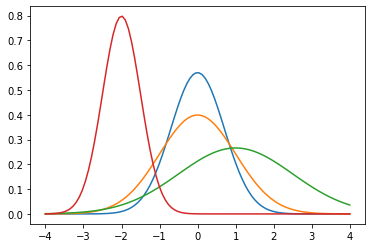

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm #책에서는 import matplotlib.mlab as mlab였지만 이 기능이 제거되었다고한다.(is decrycated)
import math
x = np.linspace(-4,4,100)
for mean, variance in [(0,0.7), (0, 1), (1, 1.5), (-2, 0.5)]:
    plt.plot(x, norm.pdf(x, mean,variance)) #정규분포 만들기
plt.show()

In [8]:
mean_expected_value = dataset['target'].mean()

In [9]:
np.mean(dataset['target'])

22.532806324110698

In [10]:
'''SSE 구하기'''
Squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
SSE = np.sum(Squared_errors)
print('Sum of squared Errors (SSE): %01.f' %SSE)

Sum of squared Errors (SSE): 42716


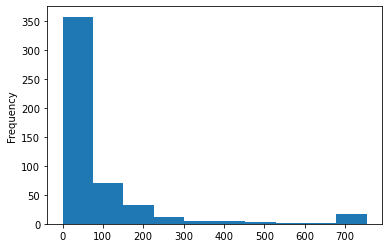

In [11]:
density_plot = Squared_errors.plot(kind ='hist') #종류를 나타내는 kind 꼭 붙이기!
plt.show()

In [12]:
''' 정규분포 정의하기'''
def standardize(x):
    return (x-np.mean(x))/np.std(x)

In [13]:
''' 중간 bias =0 으로 둔 것은 비편향추정량(unbaised estimator)을 만족하기 위해서다.
편향추정량이라도 평균제곱오차가 작으면 추정량으로 선택될 수 있기 때문에(MSE(x,E(x))= var(x) + bias(x)**2)
절대적으로 비편향추정량을 만족시킬 필요는 없지만 설계기반관점에서 설계비편향성은
절대적이다.적어도 근사 비편향성이나 일치성은 가져야 한다.'''

def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1-np.mean(variable_1))*\
                 (variable_2-np.mean(variable_2))/(observations-min(bias,1)))

def standardize(variable):
    return (variable-np.mean(variable))/np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

from scipy.stats.stats import pearsonr
print('Our correlation estimation: %0.5f' %
      (correlation(dataset['RM'], dataset['target'])))
print('Correlation from Scipy pearsonor estimation %0.5f' %pearsonr(dataset['RM'], dataset['target'])[0])

Our correlation estimation: 0.69536
Correlation from Scipy pearsonor estimation 0.69536


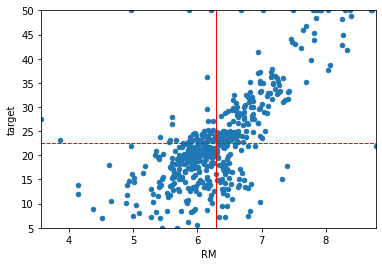

In [14]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target',\
                           xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),\
                                   dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(), \
                          dataset["RM"].mean()], y_range, '-', color='red',\
                         linewidth = 1)
plt.show()

## Statsmodels를 사용한 회귀
statsmodels는 통계분석을 염두에 두고 설계된 패키지이다. 그러므로 그 기능은 통계적인 검사와 정보에 있어서 풍부한 아웃풋 제공
그러나 학습을 위해 좋은 출발점이지만 최적화 알고리즘으로 인해 대규모 데이터셋 혹은 빅데이터를 처리해야 하는 경우에는 최적의 솔루션이 아니다.

### statsmodels를 사용해 선형회귀를 구하는 방법은 두 가지이다.
- statsmodels.api: 별개의 예측변수 및 응답변수와 함께 작동하며, 절편을 추가하는 등 예측변수의 변수 변환을 해야 한다..
- statsmodels.formula.api : R과 유사한 방법으로 작동하며, 예측변수의 합 공식과 같은 함수 형태를 지정할 수 있다.

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

실제 선형회귀 공식은 y= aX + b인데 \
statsmodels.api를 사용하면 실제로 수식은 다음과 같이 된다. y=aX \
결과적으로 예측변수 X는 예측변수와 단위상수 모두를 포함하며, a는 더 이상 단일계수가 아닌 계수의 벡터이다. \
head 메소드를 사용해 Pandas DataFrame의 첫 번째 값을 시각적으로 확인해보자.

In [17]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [18]:
'''
선형회귀 계산의 초기화 설정
'''
linear_regression = sm.OLS(y,X)

In [19]:
'''
회귀계수 a벡터의 추정을 진행
'''
fitted_model = linear_regression.fit()

In [20]:
'''
statsmodels.formula.api를 사용해 같은 결과를 얻고자 한다면 다음과 같이 입력하면 된다.
'''
linear_regression = smf.ols(formula = 'target ~ RM', data=dataset) # (응답변수명) ~ (예측변수명)
fitted_model = linear_regression.fit()

In [21]:
linear_regression = sm.OLS(y,X)
fitted_model= linear_regression.fit()
fitted_model.summary() #회귀분석에 대해 알아야 할 모든 것을 신속하게 알 수 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        22:06:46   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print(fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


### 결정계수
결과의 첫 번째 표부터 살펴보자. 첫 번째 표는 두 개의 열로 나눠진다. \
첫 번째 열은 적합 모델에 대한 설명을 포함한다.
- Dep.Variable : 목표변수를 나타낸다.
- Model : 적합 모델을 나타낸다. OLS는 선형회귀의 또 다른 방법으로 ordinary least squares의 약어이다.
- Method : 파라미터 적합 방법을 나타낸다. 최소제곱 Least squares 방법은 고전적인 계산방법이다.
- No.Observations: 사용된 관찰 개수를 나타낸다.
- DF Residuals : 잔차의 자유도를 나타내며, 관찰 개수에서 파라미터의 수를 뺀 값이다.
- DF Model : 모델에서 추정하는 파라미터의 개수를 나타내며, 상수항은 제외한다.

두 번째 표는 선형회귀모델의 적합성 정도를 나타내며, 모델과 관련해 발생할 수 있는 문제점을 지적 가능하게 한다.
- R-squared : 결정계수로, 회귀가 단순평균과 관련해 얼마나 잘 수행하는지 나타낸다.
- Adj. R-squared: 모델의 파라미터 개수와 모델 구축에 도움이 된 관찰 개수에 따라 조정된 관찰계수를 나타낸다.
- F-statistic : 통계적 관점에서 볼 때 편향을 제외한 모든 계수가 0과 다른지 나타내는 척도이다. 간단히 말해서 회귀가 단순평균보다 나은지 보여준다.
- Prob (F-statistic): 실제로 사용한 관찰로 인해 운 좋게 F-statstic에 도달할 확률을 나타내며, F-statistic의 p값(p-value)라고 한다.유의확률이라고 한다. 그 값이 충분히 낮다면 회귀가 단순평균보다 훨씬 더 좋다는 것을 확신할 수 있다. 일반적으로 통계와 과학에서 테스트 확률은 통계의 유의성에 대한 전통적인 기준인 0.05 이하여야 한다.
- AIC: 관찰 개수와 모델 자체의 복잡성을 기반으로 모델을 평가하는 점수이며, Akaike information Criterion의 약어이다. AIC 점수가 낮을수록 더 좋다. 다양한 모델을 비교하고 통계 변수를 선택할 때 매우 유용하다.
- BIC : AIC와 유사하게 작동하나 파라미터가 많은 모델에 대해 더 많은 단점(penalty)을 갖는다. Baysian Information Criterion의 약어이다.

In [23]:
mean_sum_squared_errors = np.sum((dataset['target']- dataset['target'].mean())**2) #표본분산의 합 (n-1)S**2
regr_sum_squared_errors = np.sum((dataset['target'] - fitted_values)**2) #SSE
(mean_sum_squared_errors- regr_sum_squared_errors)/mean_sum_squared_errors
'''실수로 작업하는 경우 반올림 오류가 발생할 수 있으므로 소수점 이하의 일부가 계산과 일치하지 않아도
신경 쓸 필요가 없다. 소수점 이하 8번째 숫자까지 일치하면 결과가 같다는 것을 확신해도 좋다.'''

'실수로 작업하는 경우 반올림 오류가 발생할 수 있으므로 소수점 이하의 일부가 계산과 일치하지 않아도\n신경 쓸 필요가 없다. 소수점 이하 8번째 숫자까지 일치하면 결과가 같다는 것을 확신해도 좋다.'

In [24]:
from scipy.stats.stats import pearsonr #피어슨 잔차
(pearsonr(dataset['RM'], dataset['target'])[0])**2 #피어슨의 카이제곱 통계량
'''R-squared 값과 같다.'''

'R-squared 값과 같다.'

### 계수의 의미와 중요성
아웃풋의 두 번째 표는 계수에 대해 알려주며 일련의 테스트를 제공한다.\
이런 테스트를 통해 분석의 기초에서 비롯된 몇 개의 극단적인 관찰값에 속지 않았다는 것을 확신할 수 있다.\
- coef : 추정계수를 나타낸다.
- std err : 계수 추정치의 표준오차로, 값이 크면 클수록 계수 추정치의 불확실성이 높아진다.
- t: t값(t-value)으로, 계수의 참값이 0과 다른지 나타내는 척도이다.
- P > abs(t) : 계수가 0이 아닐 확률을 나타내는 p값
- [95.0% Conf. Interval] : 다른 관찰값과 추정계수가 다를 수 있는 모든 가능성에 대해 계수의 상한값과 하한값 모두 95%로 고려함을 의미한다.

In [25]:
(np.min(dataset['RM']), np.max(dataset['RM']))

(3.561, 8.78)

모델을 적합시키기 위해 사용된 관찰 횟수는 견고하고 신뢰할 수 있는 선형회귀모델을 얻기 위한 가장 중요한 요소이다. \
관찰 횟수가 많을수록 모델이 생산에서 실행될 때 비정상적인 것이 나올 확률이 줄어든다.

### 적합값 평가
- Skewness(비대칭도) : 평균 주의 잔차의 대칭을 측정한 것으로, 대칭 분포 잔차의 경우에는 값이 0에 가까워야 한다. 양수값은 오른쪽으로 긴 꼬리를 나타내고, 음수값은 왼쪽으로 긴 꼬리를 나타낸다.
- Kurtosis(첨도) : 잔차의 분포모양을 측정한 것으로, 정규분포이면 0의값을 갖는다. 음수이면 점점 평평해지고 양수면 점점 뾰족해진다.
- Omnibus D'Angostino's test: 비대칭도와 첨도를 결합한 통계테스트이다.
- Pro(Omnibus) : 옴니버스 통계를 확률로 변환한 것이다.
- Jarque-Bera(JB) : 비대칭도와 첨도의 또다른 테스트이다.
- Prob(JB) : JB 통계를 확률로 변환한 것이다.
- Durbin-Watson : 잔차 사이의 사오간관계 여부를 나타내는 테스트이다. 시간 기반 데이터 분석과 관련이 있다.
- Cond. NO : 다중공선성(multicollinearity)에 대한 테스트이다. 여러개의 예측변수를 작업할 때 다룰것이다.

### 세가지 주의
1. 평균으로부터 너무 멀리 떨어진 값을 고려해야 한다. 큰 표준화된 잔차는 관측자료를 모델링할 때 심각한 어려움이 있음을 암시한다. 또한 이런 값들은 학습하는 과정에서 회귀계수가 왜곡됐을 수 있다.
2. 예측 변수값에 대해 다른 분산을 고려해야한다. 선형회귁 예측변수에 대해 조건부 평균인 경우 역방향 분산은 예측변수가 특정한 값을 가질 때 회기가 적절하게 작동하지 않는다는 것을 암시한다.
3. 잔차 점들의 이상한 모양은 분석하는 데이터에 대해 조금 더 복잡한 모델이 필요함을 나타낸다.

In [26]:
residuals = dataset['target'] - fitted_values
normalized_residuals = standardize(residuals)

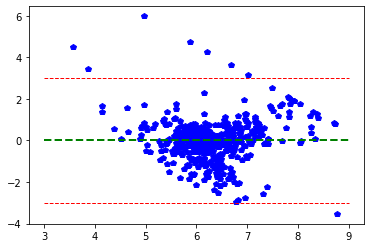

In [27]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals, 'bp')
mean_residual = plt.plot([int(x_range[0]), round(x_range[1], 0)], [0,0], '--', color='green', linewidth=2)
upper_bound = plt.plot([int(x_range[0]),  round(x_range[1], 0)], [3,3], '--', color = 'red', linewidth =1)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color = 'red', linewidth=1)

### 상관관계는 인과관계가 아니다.
예측변수를 다루는 데 도움이 되는 6가지 단어와 그 이유에 대해 제시한다.
- 직접적 인과관계 : x는 y를 유발한다.
- 상호작용 효과 : x는 y를 유발하지만 y에 의해서도 영향을 받는다.
- 허위 인과관계 : 실제로 원인이 z일 때 발생하며, x와 y를 모두 유발시킨다.
- 간접적 인과관계 : x는 실제로 y를 유발하지 않지만 다른 원인을 유발해 y를 유발한닫.
- 조건부 효과 : x는 다른 변수 z 값에 대해 y를 유발한다.
- 무작위 효과 : x와 y 사이에 기록된 일부 상관관계는 운 좋은 샘플 선택에 기인한다.

## 회귀모델을 이용한 예측
계수를 회귀 공식에 적용하면 예측은 행렬 곱셈을 통해 데이터를 계수 벡터에 적용하는 문제가 된다. \
첫째, 새로운 경우를 포함하는 배열을 제공함으로써 적합모델에 의존할 수 있다.\
다음 예제에서 단일 신규 사례를 나타내는 Xp 변수를 통해 적합 모델에서 predict 메소드를 사용해 쉽게 예측할 수 있음을 확인할 수 있다.

In [28]:
RM = 5
Xp = np.array([1,RM])
print("Our model predicts if RM = %01.f the answer value \
is %0.1f" %(RM, fitted_model.predict(Xp))) #위에 보면 알겠지만 b제로는 -34.6706 b1 = 9.1021 이다.

Our model predicts if RM = 5 the answer value is 10.8


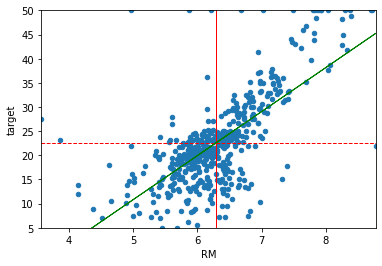

In [33]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target',\
                           xlim=x_range, ylim=y_range)

meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),\
                                   dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(), \
                          dataset["RM"].mean()], y_range, '-', color='red',\
                         linewidth = 1)
regression_line = scatter_plot.plot(dataset['RM'], fitted_values,
                                   '-', color='green', linewidth=1)
plt.show()

In [31]:
predictions_by_dot_product = np.dot(X, betas)
print("Using the prediction method: \n %s" %fitted_values[:10])
print("Using betas and a dot product: %s" %predictions_by_dot_product[:10])

Using the prediction method: 
 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Using betas and a dot product: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


## Scikit-learn을 사용한 회귀
선형모델은 Scikit-learn과 같이 좀 더 지향적인 머신 러닝 패키지를 사용해 구축할 수 있다.\
linear_model 모듈은 사용하면 예측변수가 정규화돼선 안 된다는 것과 모델에 편향이 있어야 한다는 것을 지정하는 선형회귀모델을 설정할 수 있다.

In [37]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [38]:
''' 대신, 데이터 준비에서 관찰 개수를 계산하고 예측변수로 2차원 배영을 신중하게 준비해야한다.
벡터를 사용하면 적합 절차에서 오류가 발생한다.'''
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) # X는 항상 벡터가 아닌 행렬이여야 한다.
y = dataset['target'].values
# y는 벡터가 될 수 있다.

In [39]:
''' 이전 단계를 모두 완료한 뒤 fit 메소드를 사용해 모델을 적합시킬 수 있다.'''
linear_regression.fit(X,y)

LinearRegression()

In [40]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[9.10210898]
-34.67062077643857


In [41]:
'''predict 메소드를 사용해 결과 목록의 처음 10개 원소를 분할하면 처음 10개의 예측값을 아웃풋으로 받아볼 수 있다.'''
print(linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [42]:
'''앞에서 봤듯이, 새로운 행렬을 준비하고 하나의 상수를 추가하면 간단한 행렬-벡터 곱셈을 사용해
스스로 결과를 계산할 수 있다.'''
Xp = np.column_stack((X, np.ones(observations)))
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]

In [43]:
'''예상대로 결과를 predict 메소드를 사용했을 때와 같은 추정치를 제공한다.'''
np.dot(Xp, v_coef)[:10]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

이 시점에서, lienar_model 모듈의 사용법에 의문을 가질 것이다.
statsmodels에서 제공한 이전 기능과 비교했을 때 Scikit-learn은 통계적 아웃풋을 거의 제공하지 않는 것으로 보이며,\
많은 선형회귀 기능이 제거된 것으로 보인다. \
그러나 실제로는 데이터 과학에서 필요한 것을 정확히 제공하며 대규모의 데이터 세트를 다룰 때 완벽하게 빠른 성능을 발휘한다.

In [45]:
'''IPython에서 작업하는 경우 대규모 데이터 세트를 생성하고 선형회귀의 두 버전의 성능을 확인하기 위해
다음과 같은 간단한 테스트를 시도한다.'''
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples=100000, n_features=1, n_targets=1, random_state=101)

In [46]:
'''단일변수에 대해 천만 건의 관측치를 생성한 뒤 마법 함수인 Ipython의 %%time을 사용해 측정하자.
이 마법 함수는 IPython 셀에서 작업을 완료하는 데 걸리는 시간을 자동적으로 계산한다.'''
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept = True)
sk_lienar_regression.fit(HX, Hy)


UsageError: Line magic function `%%time` not found.


In [47]:
''' Statsmodels 패키지를 사용하면 다음과 같다.'''
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

UsageError: Line magic function `%%time` not found.


## 비용 함수 최소화

최소제곱법이 최소절대오차보다 좋은점
- 음수값을 제거한다.
- 차이를 더 크게 강조한다.

In [48]:
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [49]:
def squared_cost(v,e):
    return np.sum((v-e)**2)

In [50]:
'''scipy 패키지가 제공하는 fmin 최소화 프로시저를 사용하면 하나의 벡터(x 벡터값)에 대해
최소제곱 합계를 만드는 값을 계산한다.'''
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0 = 0, xtol=1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [51]:
'''
최상의 e 값을 출력하고, 그것이 실제로 x 벡터의 평균인지 확인한다.
'''
print('The result of optimization is %0.1f'%(xopt[0]))
print('The mean is %0.1f' %(np.mean(x)))

The result of optimization is 7.8
The mean is 7.8


In [52]:
'''한편 절대 오차의 합계를 최소화하는 것이 무엇인지 알아내보자'''
def absolute_cost(v,e):
    return np.sum(np.abs(v-e))

In [54]:
xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [58]:
'''한편 절대 오차의 합계를 최소화하는 것이 무엇인지 알아내보자.'''
print('The result of optimization is %0.1f' %(xopt[0]))
print('The median is %0.1f' %(np.median(x)))

# 그것은 평균값이 아니라 중앙값인 것을 알 수 있을 것이다.
# 안타깝게도 중앙값은 평균값과 동일한 통계적 특성을 갖지 않는다.


The result of optimization is 8.0
The median is 8.0


In [60]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1))
# X는 항상 벡터가 아닌 행렬이여야 한다.
Xb = np.column_stack((X, np.ones(observations))) # 편향을 추가한다. 행렬을 augmentation 한 것임 ([X,1])
y= dataset['target'].values #y는 벡터일 수 있다.

def matrix_inverse(X,y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T,X)), np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
print(matrix_inverse(Xb,y))
print(matrix_inverse(Xb,y, pseudo=True))
print(normal_equations(Xb,y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


In [61]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1))
# X는 항상 행렬이여야 하며, 벡터는 될 수 없다.
X = np.column_stack((X, np.ones(observations))) #바이어스를 추가한다.
y = dataset['target'].values # y는 벡터일 수 있다.

In [62]:
import random
def random_w(p):
    return np.array([np.random.normal() for j in range(p)])
def hypothesis(X,w):
    return np.dot(X,w)
def loss(X,w,y):
    return hypothesis(X,w)-y
def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len(y))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y)*X[:,j])/n)
    return gradients
def update(X,w,y, alpha=0.01):
    return [t-alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta=10**-12, iterations = 1000):
    w= random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL-SSL <= eta and \
                    new_SSL-SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k%(iterations/20) == 0:
            path.append(new_SSL)
    return w, path

In [63]:
'''기울기 하강이 작동하는 데 필요한 모든 함수를 최종적으로 정의한 후
단일 회귀 문제에 대한 솔루션을 위해 최적화를 시작한다.'''
alpha = 0.048
w, path = optimize(X,y, alpha, eta=10**-12, iterations = 25000)
print('These are our final coefficients: %s'%w)
print('Obtained walking on this path of squared loss %s' %path)

These are our final coefficients: [9.10210307788594, -34.670583224886435]
Obtained walking on this path of squared loss [207672.30610483704, 23843.987353685363, 22482.740024648403, 22161.269256332194, 22085.351050523906, 22067.422285170403, 22063.188246395664, 22062.188340156026, 22061.952203327517, 22061.89643749711, 22061.883267895995, 22061.880157776548, 22061.879423293936, 22061.879249839287, 22061.87920887641, 22061.87919920266, 22061.87919691812, 22061.879196378603, 22061.879196251193, 22061.8791962211, 22061.879196220594]


Scikit-learn의 linear_regression은 실제로 기울기 하강에 의해 구동되므로, 크기가 큰 빅데이터를 사용하는 데이터 과학 프로젝트에서 작업할 때 선호한다.